In [4]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

Saving BooksDataSet.csv to BooksDataSet (1).csv


In [6]:
books=pd.read_csv('BooksDataSet.csv')
books.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [7]:
#Keeping only the relevant columns
books = books[["book_id", 'book_name', 'genre', 'summary']]
books.head()

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [8]:
#Number of books for each genre
books['genre'].value_counts()

,count
genre,
Fantasy,500
Science Fiction,500
Crime Fiction,500
Historical novel,500
Horror,500
Thriller,500


**Data pre-processing**

Preprocessing the "summary" column and making it ready for prediction.

1. At first the the "summary" is traversed and only the alphabets are kept while filtering out everything else and then the alphabets are converted into lowercase.

2. The most common words also known as stop words are removed.

3. Lemmatization is performed.

4. Stemming is performed.

In [9]:
books['summary'].head()

,summary
0,Drowned Wednesday is the first Trustee among ...
1,"As the book opens, Jason awakens on a school ..."
2,Cugel is easily persuaded by the merchant Fia...
3,The book opens with Herald-Mage Vanyel return...
4,Taran and Gurgi have returned to Caer Dallben...


In [10]:
def clean_text(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    return ' '.join(text.split()).lower()

books.loc[:,'summary']=books.loc[:,'summary'].apply(lambda x: clean_text(x))
books['summary'].head()

,summary
0,drowned wednesday is the first trustee among t...
1,as the book opens jason awakens on a school bu...
2,cugel is easily persuaded by the merchant fian...
3,the book opens with herald mage vanyel returni...
4,taran and gurgi have returned to caer dallben ...


Graph to visualize the words and frequency in book's summary.




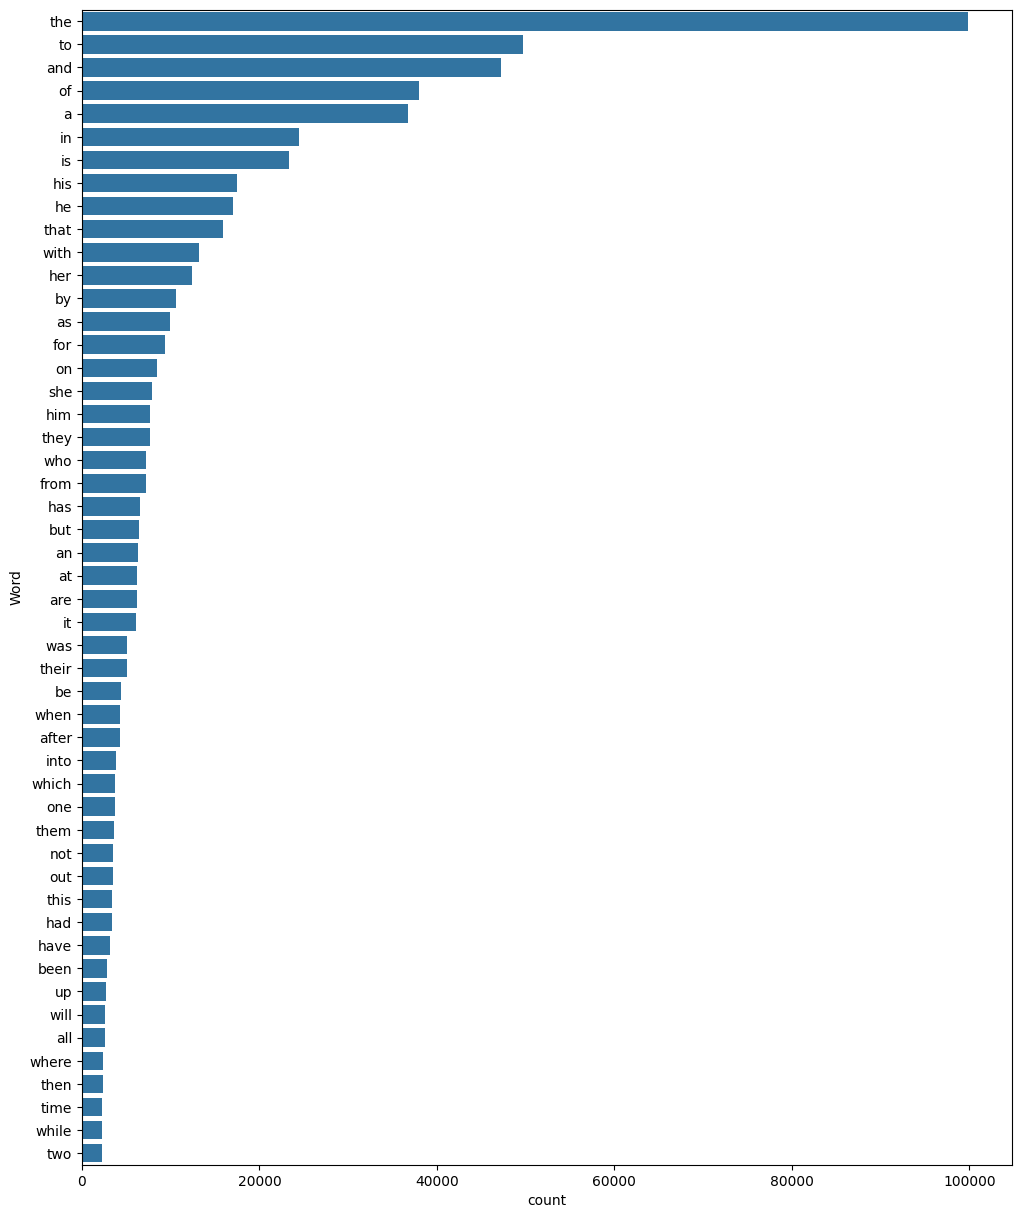

In [11]:
#Function to visualize the words and frequency in book's summary.

print("Graph to visualize the words and frequency in book's summary.\n\n")

def freqwords(x, terms):
  allwords = ' '.join([text for text in x])
  allwords = allwords.split()
  fdist = nltk.FreqDist(allwords)
  wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})


  d = wordsdf.nlargest(columns="count", n = terms)

  # visualize words and frequencies
  plt.figure(figsize=(12,15))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

# print 100 most frequent words
freqwords(books['summary'], 50)

In [12]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def removestopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

books['summary'] = books['summary'].apply(lambda x: removestopwords(x))
books['summary'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,summary
0,drowned wednesday first trustee among morrow d...
1,book opens jason awakens school bus unable rem...
2,cugel easily persuaded merchant fianosther att...
3,book opens herald mage vanyel returning countr...
4,taran gurgi returned caer dallben following ev...


Graph to visualize the words and frequency in book's summary.




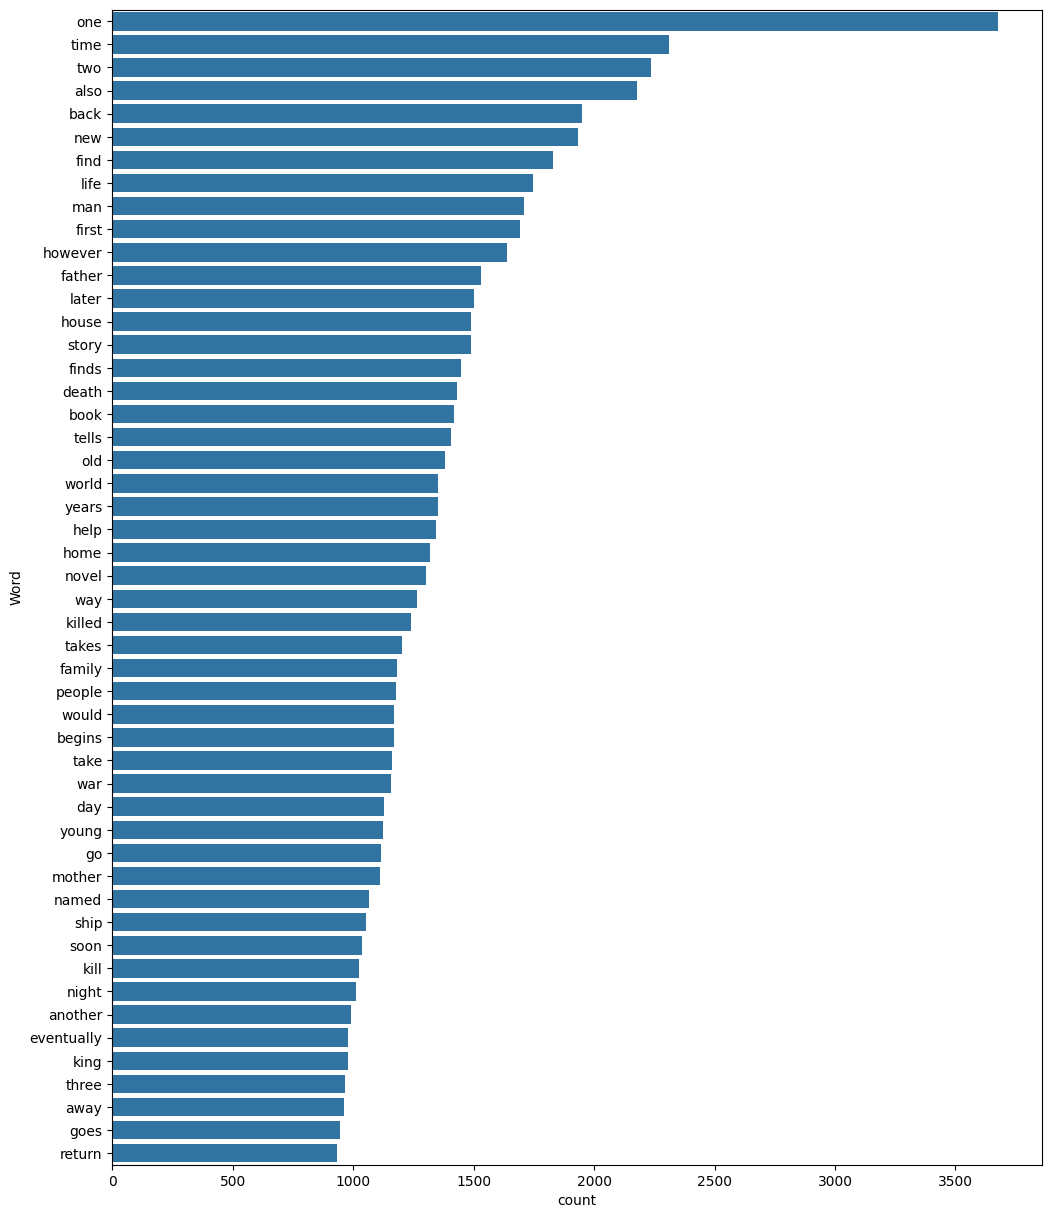

In [13]:
#Function to visualize the words and frequency in book's summary after stopwords are removed

print("Graph to visualize the words and frequency in book's summary.\n\n")

def freqwords(x, terms):
  allwords = ' '.join([text for text in x])
  allwords = allwords.split()
  fdist = nltk.FreqDist(allwords)
  wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})


  d = wordsdf.nlargest(columns="count", n = terms)

  # visualize words and frequencies
  plt.figure(figsize=(12,15))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

# print 100 most frequent words
freqwords(books['summary'], 50)

In [14]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['summary'] = books['summary'].apply(lambda x: lematizing(x))
books['summary'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,summary
0,drowned wednesday first trustee among morrow d...
1,book open jason awakens school bus unable reme...
2,cugel easily persuaded merchant fianosther att...
3,book open herald mage vanyel returning country...
4,taran gurgi returned caer dallben following ev...


In [15]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(sentence):

    stemmed_words = [stemmer.stem(word) for word in sentence.split()]
    return ' '.join(stemmed_words)

books['summary'] = books['summary'].apply(stemming)
books['summary'].head()

,summary
0,drown wednesday first truste among morrow day ...
1,book open jason awaken school bu unabl rememb ...
2,cugel easili persuad merchant fianosth attempt...
3,book open herald mage vanyel return countri va...
4,taran gurgi return caer dallben follow event t...


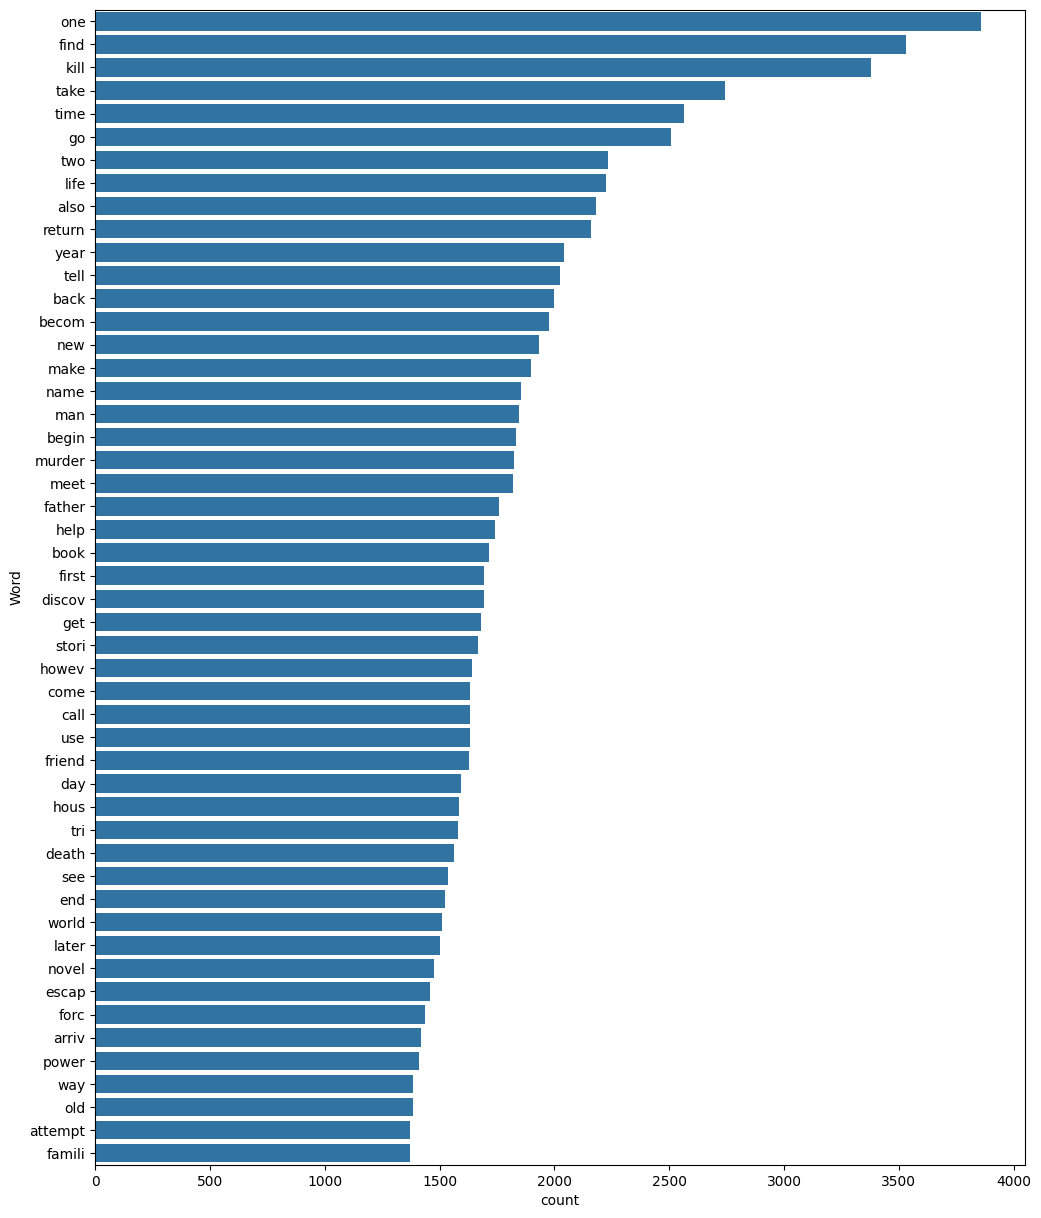

In [16]:
freqwords(books['summary'], 50)

Encoding the genres

In [17]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

y=LE.fit_transform(books['genre'])

In [18]:
LE.inverse_transform([0,1,2,3,4,5])

array(['Crime Fiction', 'Fantasy', 'Historical novel', 'Horror',
       'Science Fiction', 'Thriller'], dtype=object)

Training our Machine Learning Models

In [19]:
#splitting the dataset into training and testing dataset
xtrain, xtest, ytrain, ytest = train_test_split(books['summary'], y, test_size=0.2, random_state=42)

In [20]:
#Performing tf-idf

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain.values.astype('U'))

xtest_tfidf = tfidf_vectorizer.transform(xtest.values.astype('U'))

In [22]:
from sklearn import svm

svc = svm.SVC(kernel='linear').fit(xtrain_tfidf,ytrain)

svpred=svc.predict(xtest_tfidf)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



print( 'Accuracy Score :',accuracy_score(ytest,svpred) )
print ('Report : ')
print(classification_report(ytest,svpred))


Accuracy Score : 0.7216666666666667
Report : 
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        96
           1       0.75      0.73      0.74       118
           2       0.70      0.80      0.75       101
           3       0.72      0.67      0.69        91
           4       0.80      0.75      0.77        99
           5       0.63      0.60      0.61        95

    accuracy                           0.72       600
   macro avg       0.72      0.72      0.72       600
weighted avg       0.72      0.72      0.72       600



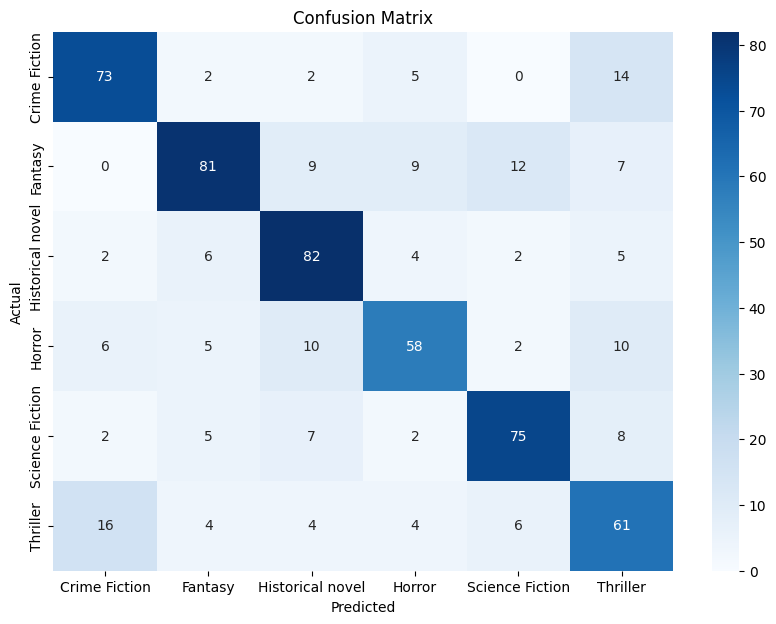

In [24]:
from sklearn.metrics import confusion_matrix

y_pred = svc.predict(xtest_tfidf)

cm = confusion_matrix(ytest, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LE.classes_, yticklabels=LE.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


['Crime Fiction' 'Fantasy' 'Historical novel' 'Horror' 'Science Fiction'
 'Thriller']


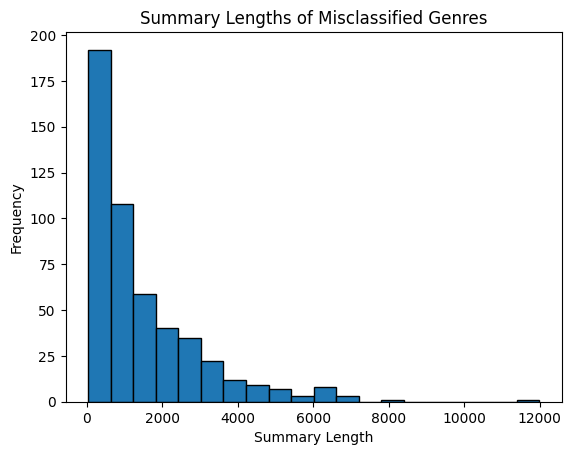

The range of summary lengths with the maximum misclassifications is: 36.0 to 633.25


In [40]:
# Get genre names from the LabelEncoder
genre_names = LE.classes_
print(genre_names)

# Identify misclassified genres by comparing predictions with true labels
misclassified_genres = [genre_names[i] for i in range(6) if y_pred[i] != ytest[i]]

# Filter the books DataFrame for misclassified genres
misclassified_books = books[books['genre'].isin(misclassified_genres)]

# Extract the summary length of misclassified books
misclassified_lengths = misclassified_books['summary_length']

#plotting the histogram
counts, bins, patches = plt.hist(misclassified_lengths, bins=20, edgecolor='black')
max_count_bin = counts.argmax()
bin_range = (bins[max_count_bin], bins[max_count_bin + 1])

plt.xlabel('Summary Length')
plt.ylabel('Frequency')
plt.title('Summary Lengths of Misclassified Genres')
plt.show()

print(f"The range of summary lengths with the maximum misclassifications is: {bin_range[0]} to {bin_range[1]}")

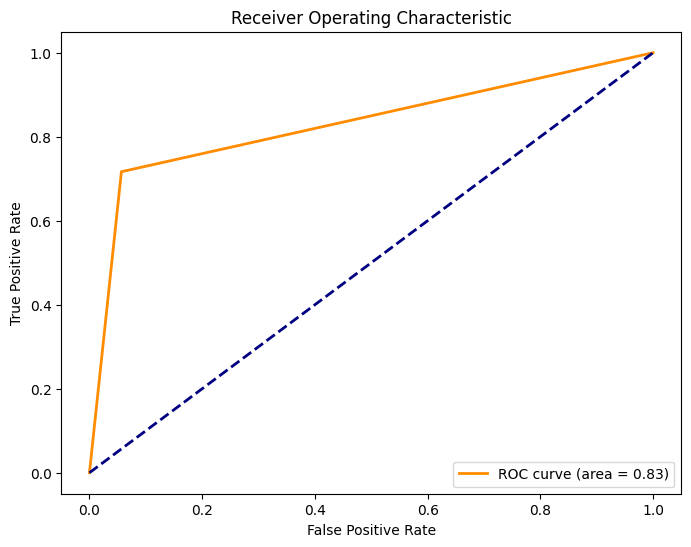

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

lb = LabelBinarizer()
ytest_bin = lb.fit_transform(ytest)
svpred_bin = lb.transform(svpred)

fpr, tpr, thresholds = roc_curve(ytest_bin.ravel(), svpred_bin.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

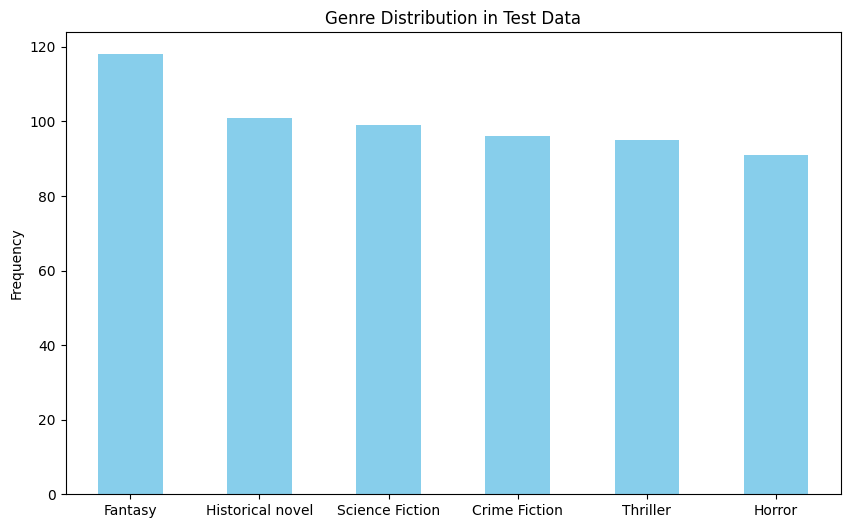

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

genre_names = LE.inverse_transform(ytest)  # This gives you the original genre names

# Count the frequency of each genre in the test data
genre_counts = pd.Series(genre_names).value_counts()

# Plotting the genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')

# Set plot title and labels
plt.title('Genre Distribution in Test Data')
plt.xlabel('')
plt.ylabel('Frequency')

# Display the plot
plt.xticks(rotation=0)  # Rotate the genre labels for better readability
plt.show()


In [53]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   book_id         3000 non-null   int64 
 1   book_name       3000 non-null   object
 2   genre           3000 non-null   object
 3   summary         3000 non-null   object
 4   summary_length  3000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 117.3+ KB
